In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import respy as rp

params, options = rp.get_example_model("kw_94_one", with_data=False)


In [2]:
params.drop(index="meas_error", level=0, inplace=True)

options["simulation_agents"] = 100

simulate = rp.get_simulate_func(params, options)
df = simulate(params)

In [3]:
crit_func = rp.get_crit_func(params, options, df)
crit_func(params)

[-9.30010134]
[-9.53671318]
[-9.13968912]
[-9.18749825]
[-9.64738238]
[-9.3138175]
[-9.23473088]
[-10.19915843]
[-9.62908881]
[-10.07734744]
[-9.16445613]
[-10.51855517]
[-9.40469549]
[-9.97812041]
[-9.44856938]
[-10.55309503]
[-10.7282404]
[-9.340505]
[-9.8773927]
[-9.70696873]
[-9.40904255]
[-9.36493623]
[-10.29297636]
[-9.52841218]
[-9.92402082]
[-10.05181397]
[-9.79375265]
[-9.43810681]
[-9.73675068]
[-9.55680867]
[-9.42547967]
[-9.48263982]
[-10.19614925]
[-9.47059871]
[-9.45893849]
[-11.20842325]
[-10.08030962]
[-11.95074632]
[-8.88430239]
[-9.35795314]
[-9.08590957]
[-9.57544404]
[-9.0641792]
[-9.41593018]
[-10.52299996]
[-9.55349183]
[-9.46176655]
[-9.91754458]
[-9.75638688]
[-10.69856245]
[-10.15419]
[-9.80540363]
[-9.69632777]
[-9.79637995]
[-10.56378831]
[-11.0216317]
[-9.93022781]
[-11.81322847]
[-9.98043017]
[-10.54139261]
[-10.01485511]
[-11.59886695]
[-11.84274816]
[-10.09621173]
[-10.61110036]
[-10.5721041]
[-10.3513158]
[-10.2095129]
[-10.21715734]
[-10.17727969]
[-10.

-381.7296798223769

In [4]:
invariant = -np.log(2 * np.pi) / 2
log_wage_observed = 9.1
log_wage_systematic = 9.1
sigma_squared = 1

shock = log_wage_observed - log_wage_systematic

sigma = np.sqrt(sigma_squared)

loglike = (
            invariant
            - log_wage_observed
            - np.log(sigma)
            - shock ** 2 / (2 * sigma_squared)
        )

np.exp(loglike)

4.454821228191607e-05

In [8]:
from scipy.stats import norm
norm(loc=0, scale=sigma_squared).pdf(shock) / np.exp(log_wage_observed)


4.454821228191606e-05

In [139]:
from scipy.stats import lognorm
lognorm(s=np.sqrt(sigma), scale=np.exp(log_wage_systematic)).pdf(np.exp(log_wage_observed))
#log_wage_systematic, log_wage_observed

4.454821228191606e-05

In [112]:
import pickle as pkl

log_systematic = pkl.load(open("systematic.respy.pkl", "rb"))
log_observed = pkl.load(open("observed.respy.pkl", "rb"))

(array([  11.,   73.,  338.,  787., 1090.,  784.,  428.,  136.,   23.,
           5.]),
 array([-0.69718686, -0.53463134, -0.37207581, -0.20952029, -0.04696477,
         0.11559076,  0.27814628,  0.44070181,  0.60325733,  0.76581285,
         0.92836838]),
 <a list of 10 Patch objects>)

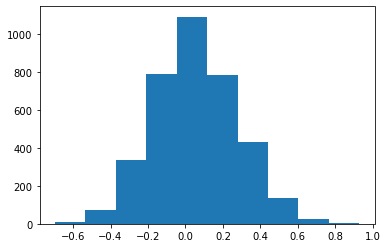

In [135]:
import matplotlib.pyplot as plt

plt.hist(log_observed - log_systematic)